# ADS Assignment 2

## Submitted By:

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy 
import seaborn as sns

np.random.seed(40) # set a seed so that the results are consistent

In [2]:
'''path for dataset'''
my_path = 'C:\\Users\\aishw\\OneDrive\\Desktop\\ADS\\Assignment2'

In [3]:
'''Read titanic dataset into notebook'''
df = pd.read_csv(f'{my_path}/Titanic_full.csv')
print(df.shape)
df.head(3)

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

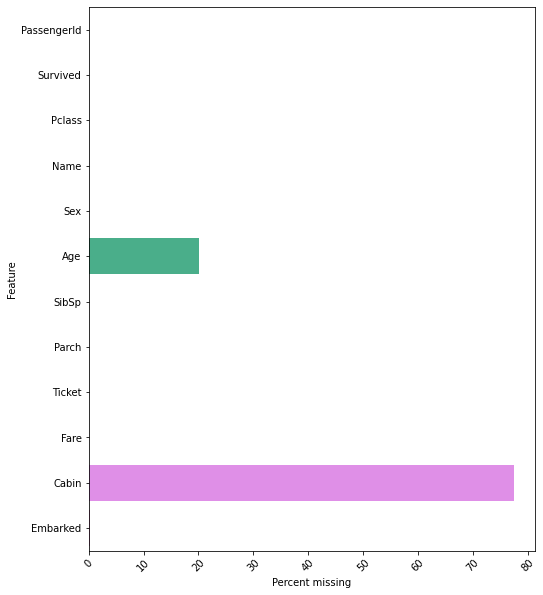

In [5]:
'''Calculate percentage null values for each column or feature'''

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [6]:
'''Drop rows with any null values'''

df1 = df.dropna(subset = ["Age","Cabin"])
df1.shape

(272, 12)

In [7]:
'''remove all the duplicate values from dataset'''
df2 = df1.drop_duplicates()
print(df2.shape)
df2.head(2)

(272, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [8]:
'''converting male female sex into binary 1,0 respectively'''
df2['Sex']=np.where(df2['Sex']=='female',0,1)
df2.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",1,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",1,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",1,65.0,0,1,113509,61.9792,B30,C


In [9]:
'''dropping the columns that are not required'''
df2.drop(columns=['Name', 'Ticket','Cabin'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,C
3,4,1,1,0,35.0,1,0,53.1000,S
6,7,0,1,1,54.0,0,0,51.8625,S
10,11,1,3,0,4.0,1,1,16.7000,S
11,12,1,1,0,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
1295,1296,0,1,1,43.0,1,0,27.7208,C
1296,1297,0,2,1,20.0,0,0,13.8625,C
1298,1299,1,1,1,50.0,1,1,211.5000,C
1302,1303,0,1,0,37.0,1,0,90.0000,Q


In [10]:
'''Converting dataframe to numpy array'''
X = np.array(df2.loc[:,set(df2.columns)-set(['Embarked'])])
y = np.array(df2.loc[:,'Embarked'])

C:\Users\aishw\AppData\Local\Temp\ipykernel_2748\1659234151.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = np.array(df2.loc[:,set(df2.columns)-set(['Embarked'])])


In [11]:
'''Label encoding'''
from numpy import copy as cp
d={'C':0,'S':1,'Q':2}
Y = cp(y)
for k, v in d.items(): Y[y==k] = v

In [12]:
'''dataset shape'''
X = copy.deepcopy(X.T)
Y = copy.deepcopy(Y.reshape(-1,1).T)

In [13]:
shape_X = X.shape
shape_Y = Y.shape

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))

The shape of X is: (11, 272)
The shape of Y is: (1, 272)


## Neural Network

In [14]:
def layer_shapes(X, Y, no_of_hidden_layers=1):

    training_size = X.shape[0] # size of input layer
    no_of_hidden_layers = no_of_hidden_layers
    output_size = Y.reshape(-1,1).T.shape[0] # size of output layer

    return (training_size, no_of_hidden_layers, output_size)

N = 400
D = 2
K = 2

X = np.zeros((N*K,D)) 
Y = np.zeros(N*K, dtype='int')

for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0, 1, N) 
    t = np.linspace(j*4.2, (j+1)*4.2, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = (0 if j % 2 == 0 else 1)

X = copy.deepcopy(X.T)
Y = copy.deepcopy(Y.reshape(-1,1).T)

(training_size, no_of_hidden_layers, output_size) = layer_shapes(X, Y)
print("The size of the input layer is: training_size = " + str(training_size))
print("The size of the hidden layer is: no_of_hidden_layers = " + str(no_of_hidden_layers))
print("The size of the output layer is: output_size = " + str(output_size))

The size of the input layer is: training_size = 2
The size of the hidden layer is: no_of_hidden_layers = 1
The size of the output layer is: output_size = 1


In [15]:
def initialize_parameters(training_size, no_of_hidden_layers, output_size):
    
    np.random.seed(40)

    W1 = np.random.randn(no_of_hidden_layers, training_size) * 0.01
    b1 = np.zeros((no_of_hidden_layers,1))
    
    W2 = np.random.randn(output_size, no_of_hidden_layers) * 0.01
    b2 = np.zeros((output_size,1))
    
    assert (W1.shape == (no_of_hidden_layers, training_size))
    assert (b1.shape == (no_of_hidden_layers, 1))
    assert (W2.shape == (output_size, no_of_hidden_layers))
    assert (b2.shape == (output_size, 1))
    
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return parameters

## Activating function Relu

In [16]:
def relu(x):
    z=[]
    for k in x:
        t=[]
        for i in k:
            t.append(max(0,i))
        z.append(t)
    z=np.array(z)
    z = 1/(1 + np.exp(-z))
    return z

In [17]:
def forward_propagation(X, parameters):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
        
    # Implement Forward Propagation
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = relu(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

## log loss function

In [18]:
def compute_cost(A2, Y):
    
    m = Y.shape[1] 

    # Compute the cross-entropy cost
    logprobs = np.dot(Y,np.log(A2).T) + np.dot((1-Y),np.log((1-A2)).T)
    cost = -logprobs/m

    cost = float(np.squeeze(cost))  
    assert(isinstance(cost, float))
    
    return cost

In [19]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2,axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,"db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

In [20]:
def update_parameters(parameters, grads, learning_rate = 1.2):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [21]:
'''code for stochastic gradient descent for optimization'''
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):

    np.random.seed(40)
    n_x, n_h, n_y = layer_shapes(X, Y, n_h)
    
    parameters = initialize_parameters(n_x, n_h, n_y)

    # gradient descent
    for i in range(0, num_iterations):
         
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function
        cost = compute_cost(A2, Y)
 
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [22]:
def predict(parameters, X):
    # Computes probabilities 
    A2, cache = forward_propagation(X, parameters)
    threshold = 0.5 
    predictions = (A2 > threshold)
    
    return predictions

In [23]:
parameters = nn_model(X, Y, n_h = 1, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.693146
Cost after iteration 1000: 0.523457
Cost after iteration 2000: 0.571849
Cost after iteration 3000: 0.576572
Cost after iteration 4000: 0.573179
Cost after iteration 5000: 0.569069
Cost after iteration 6000: 0.563645
Cost after iteration 7000: 0.552592
Cost after iteration 8000: 0.540972
Cost after iteration 9000: 0.531064


In [24]:
'''Print accuracy'''
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 76%


In [25]:
'''calculate F1 score'''
def f1(y_true, y_pred):
    TP = np.sum(np.multiply([i==True for i in y_pred], y_true))
    TN = np.sum(np.multiply([i==False for i in y_pred], [not(j) for j in y_true]))
    FP = np.sum(np.multiply([i==True for i in y_pred], [not(j) for j in y_true]))
    FN = np.sum(np.multiply([i==False for i in y_pred], y_true))
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    if precision != 0 and recall != 0:
        f1 = (2 * precision * recall) / (precision + recall)
    else:
        f1 = 0
    return f1

In [26]:
f1(Y[0],predictions[0])

0.6936790923824959

## Regularization

### L1 (Lasso Regularization)

In [27]:
'''In L1 regularization, we add absolute value of magnitude of coefficient as penalty term to the loss function.'''

def compute_cost(A2, Y):
    
    m = Y.shape[1] # number of example
    
    
    # compute the regularization penalty
    L1_regularization_penalty = np.sum(np.absolute(A2))


    # Compute the cross-entropy cost
    logprobs = np.dot(Y,np.log(A2).T) + np.dot((1-Y),np.log((1-A2)).T)
    cost = -logprobs/m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    # compute the total cost
    cost = cost + L1_regularization_penalty
    
    return cost

## L2 Ridge Regularization 

In [28]:

'''In L2 regularization, we add squared magnitude of coefficient as penalty term to the loss function.'''
def compute_cost(A2, Y):
    
    m = Y.shape[1] # number of example
    
    
    # compute the regularization penalty
    L2_regularization_penalty = (
        1 / (2 * m)) * np.sum(np.square(A2))


    # Compute the cross-entropy cost
    logprobs = np.dot(Y,np.log(A2).T) + np.dot((1-Y),np.log((1-A2)).T)
    cost = -logprobs/m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    # compute the total cost
    cost = cost + L2_regularization_penalty
    
    return cost